Algorithme avec trois particules
Choisir k solutions aleatoires x1, x2 ... xk
Vi   0 (i=1,...,k)
Choisir k meilleurs solutions aleatoirement P1; :::; Pk
Initialiser aleatoirement la meilleure solution de l'essaim Pg0
Choisir  entre 0 et 1
while i < N do
Choisir b1; b2 aleatoirement
Pg   la meilleure solution entre P1; P2; :::; Pk
Mettre a jour les vitesses Vi (i=1,...,k)
Mettre a jour xi(i=1,...,k)
Mettre a jour la meilleure solution de chaque particule Pi(i=1,...,k)
if jPg 􀀀 Pg0 j <  then
Fin des calculs
end if
Pg0   Pg
end while
La solution se trouve dans Pg
Figure 1: Dierentes possibilites de communication entre particules

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Implementer cet algorithme sous Python pour rechercher le minimum de :
• f1(x) = (x 􀀀 1)2  (x 􀀀 8)2 avec 3  x
• f2(x) = 4
39 (x 􀀀 10)2 + 4 avec 3  x
• f3(x1; x2) = x1
2 􀀀 cos(2x1) + x22
􀀀 cos(2x2) + 2
Pour chacune de ces deux fonctions :
1. Tester le programme avec plusieurs parametres
2. Tracer la fonction
3. Tracer l'evolution des solutions Pg et Pi (i = 1; :::; k)

In [39]:
def f1(x):
    return (x - 1)**2 * (x - 8)**2

def f2(x):
    return (4/39) * (x - 10)**2 + 4

def f3(x):
    x1, x2 = x
    return x1**2 - np.cos(2 * np.pi * x1) + x2**2 - np.cos(2 * np.pi * x2) + 2

In [40]:
# Paramètres de PSO
w = 0.5
c1 = 1.5
c2 = 1.5
num_particles = 3
num_iterations = 10

In [41]:
# Initialisation des particules
def initialize_particles(bounds, num_particles):
    particles = np.random.uniform(bounds[0], bounds[1], (num_particles, len(bounds[0])))
    velocities = np.zeros_like(particles)
    return particles, velocities

In [42]:
# Mise à jour des vitesses et positions
def update_particles(particles, velocities, p_best, g_best, w, c1, c2):
    r1, r2 = np.random.rand(), np.random.rand()
    velocities = w * velocities + c1 * r1 * (p_best - particles) + c2 * r2 * (g_best - particles)
    particles += velocities
    return particles, velocities

In [43]:
# Algorithme PSO
def pso(func, bounds, num_particles, num_iterations):
    particles, velocities = initialize_particles(bounds, num_particles)
    p_best = particles.copy()
    p_best_values = np.apply_along_axis(func, 1, p_best)
    g_best = p_best[np.argmin(p_best_values)]

    g_best_values = []
    particles_positions = [particles.copy()]

    for _ in range(num_iterations):
        particles, velocities = update_particles(particles, velocities, p_best, g_best, w, c1, c2)
        values = np.apply_along_axis(func, 1, particles)

        better_mask = values < p_best_values
        p_best[better_mask] = particles[better_mask]
        p_best_values[better_mask] = values[better_mask]

        if np.min(values) < np.min(p_best_values):
            g_best = particles[np.argmin(values)]

        g_best_values.append(func(g_best))
        particles_positions.append(particles.copy())

    return g_best, g_best_values, particles_positions

In [44]:
# les bornes pour chaque fonction
bounds_f1 = ([3], [10])
bounds_f2 = ([3], [10])
bounds_f3 = ([-5, -5], [5, 5])

In [45]:
# Rechercher le minimum pour chaque fonction
g_best_f1, g_best_values_f1 = pso(f1, bounds_f1, num_particles, num_iterations)
g_best_f2, g_best_values_f2 = pso(f2, bounds_f2, num_particles, num_iterations)
g_best_f3, g_best_values_f3 = pso(f3, bounds_f3, num_particles, num_iterations)

print("Minimum de f1:", g_best_f1, "avec valeur:", f1(g_best_f1))
print("Minimum de f2:", g_best_f2, "avec valeur:", f2(g_best_f2))
print("Minimum de f3:", g_best_f3, "avec valeur:", f3(g_best_f3))

Minimum de f1: [7.76676779] avec valeur: [2.49080422]
Minimum de f2: [9.65949403] avec valeur: [4.01189172]
Minimum de f3: [-1.05320138  1.20529967] avec valeur: 3.340149256446497


Text(0, 0.5, 'f1(x)')

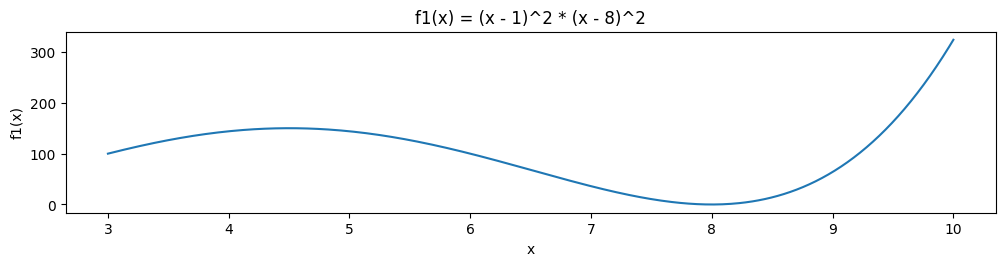

In [53]:
# Tracer les fonctions et l'évolution des solutions
plt.figure(figsize=(12, 8))
x = np.linspace(3, 10, 400)
plt.subplot(3, 1, 1)
plt.plot(x, f1(x))
plt.title("f1(x) = (x - 1)^2 * (x - 8)^2")
plt.xlabel("x")
plt.ylabel("f1(x)")

Text(0, 0.5, 'f2(x)')

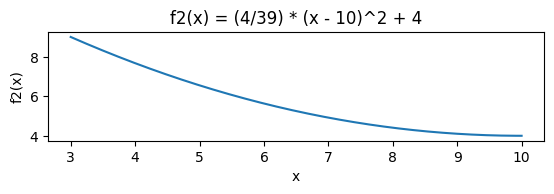

In [47]:
# Tracer f2
plt.subplot(3, 1, 2)
plt.plot(x, f2(x))
plt.title("f2(x) = (4/39) * (x - 10)^2 + 4")
plt.xlabel("x")
plt.ylabel("f2(x)")

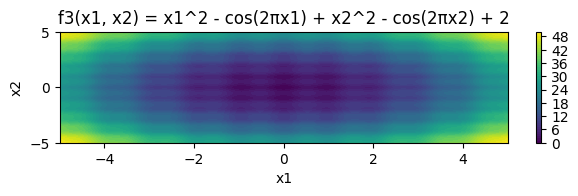

In [48]:
# Tracer f3
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = f3([X1, X2])
plt.subplot(3, 1, 3)
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.title("f3(x1, x2) = x1^2 - cos(2πx1) + x2^2 - cos(2πx2) + 2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.tight_layout()
plt.show()

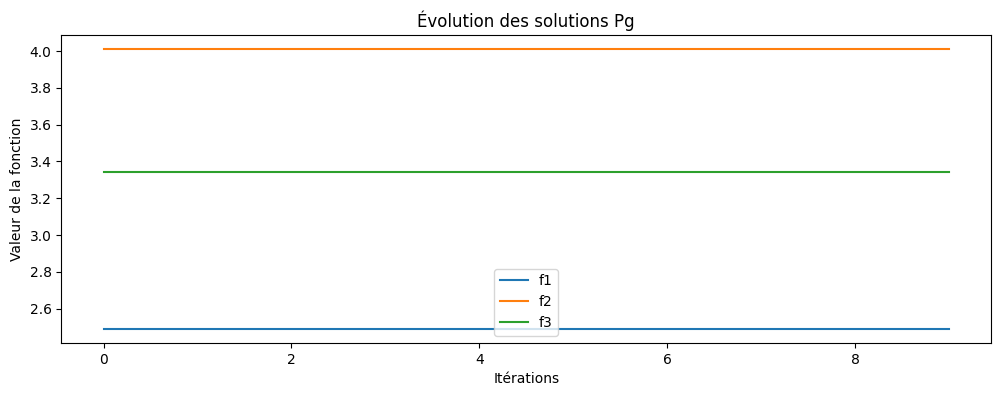

In [49]:
# Tracer l'évolution des solutions Pg
plt.figure(figsize=(12, 4))
plt.plot(g_best_values_f1, label='f1')
plt.plot(g_best_values_f2, label='f2')
plt.plot(g_best_values_f3, label='f3')
plt.title("Évolution des solutions Pg")
plt.xlabel("Itérations")
plt.ylabel("Valeur de la fonction")
plt.legend()
plt.show()


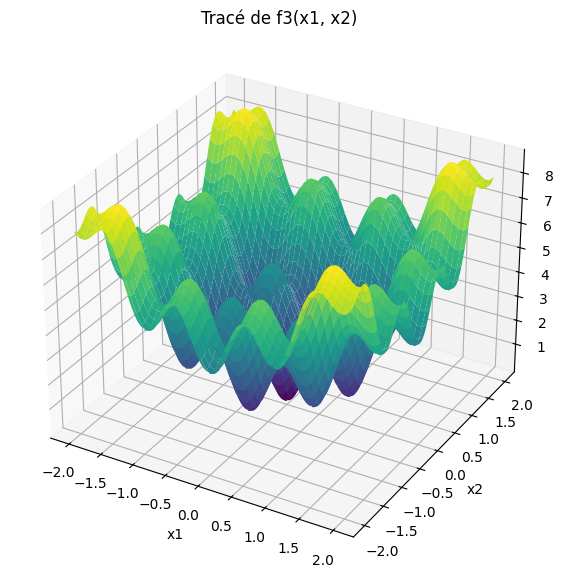

In [55]:
# Fonction pour tracer f3(x)
def plot_f3():
    x1 = np.linspace(-2, 2, 400)
    x2 = np.linspace(-2, 2, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = X1**2 - np.cos(2 * np.pi * X1) + X2**2 - np.cos(2 * np.pi * X2) + 2
        #return x1**2 - np.cos(2 * np.pi * x1) + x2**2 - np.cos(2 * np.pi * x2) + 2

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_title('Tracé de f3(x1, x2)')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f3(x1, x2)')
    plt.show()
plot_f3()

Minimum de f1: [4.12490382] avec valeur: [146.63521567]
Minimum de f2: [9.87475929] avec valeur: [4.00160874]
Minimum de f3: [2.06317232 1.46697847] avec valeur: 8.465004206616058


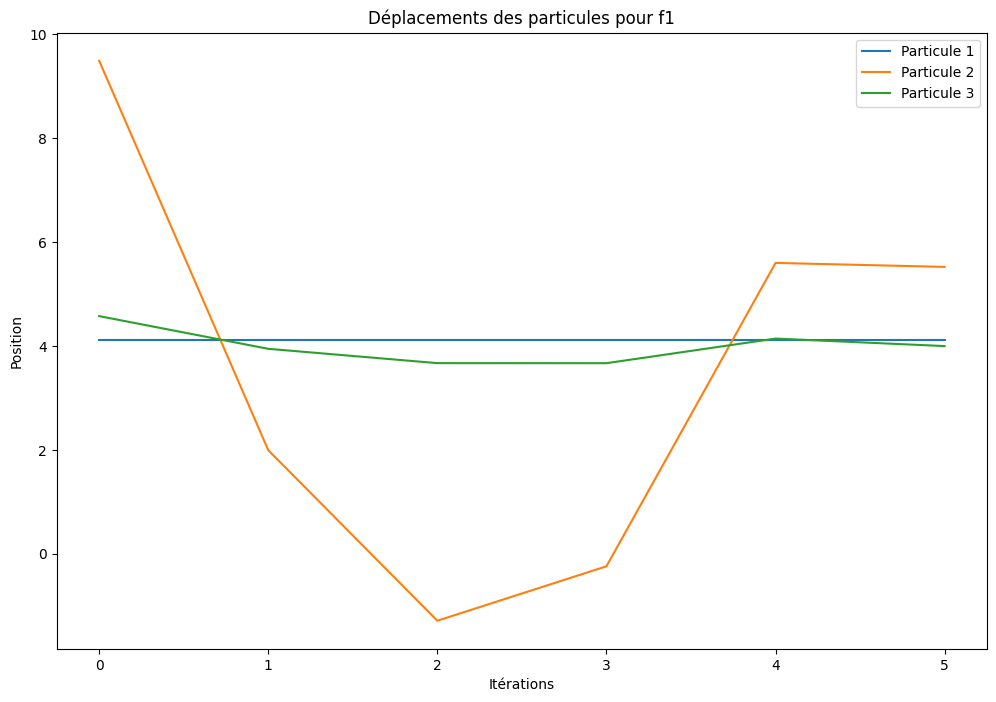

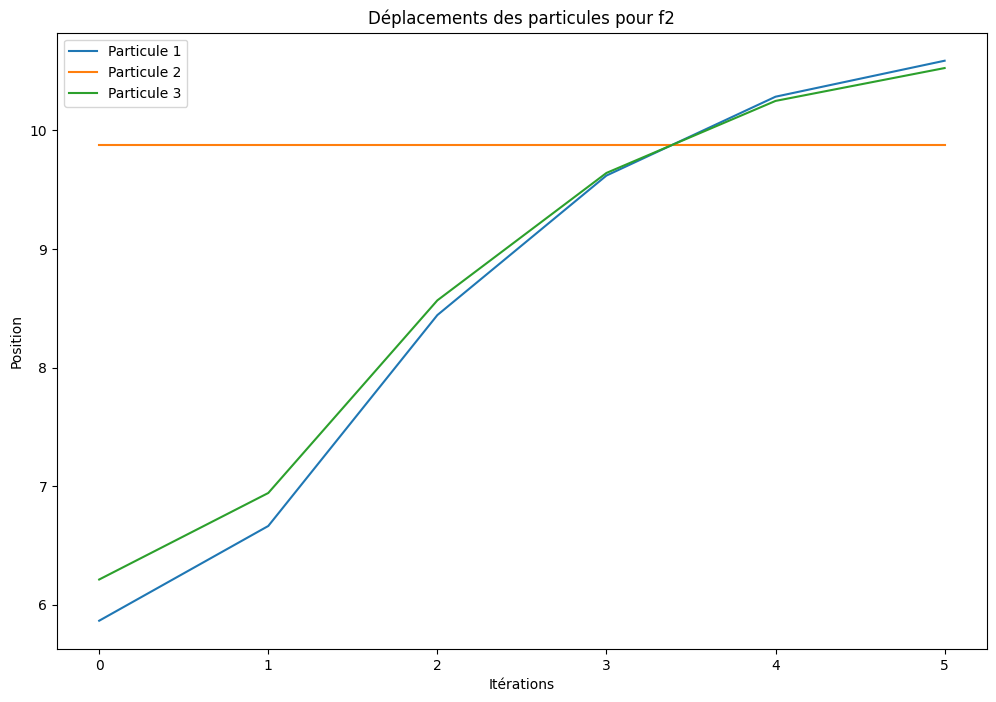

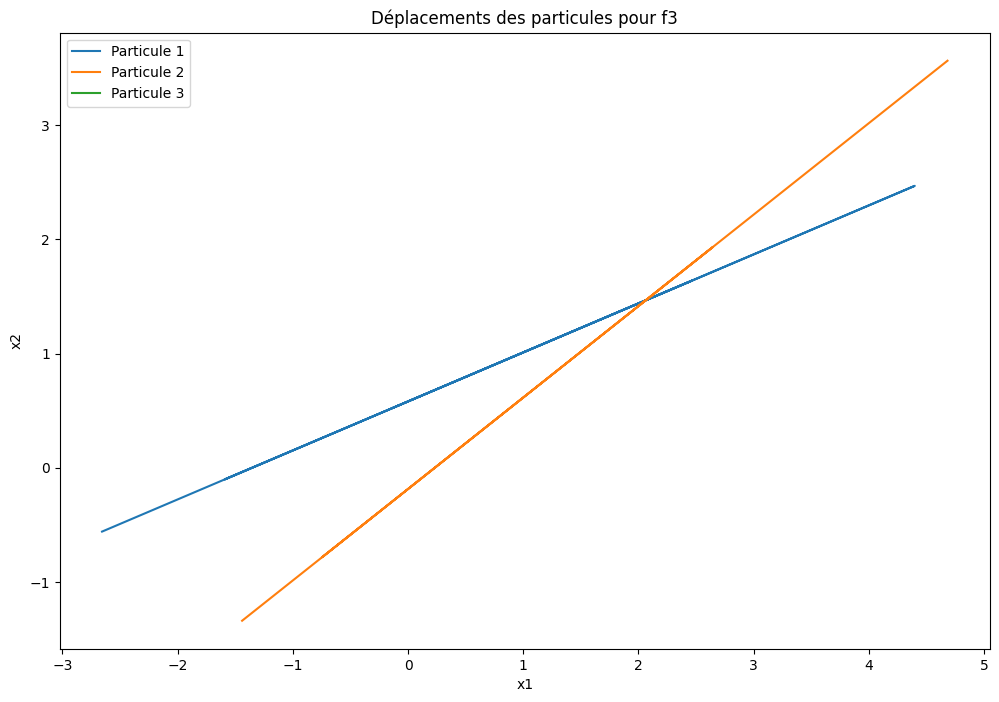

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return (x - 1)**2 * (x - 8)**2

def f2(x):
    return (4/39) * (x - 10)**2 + 4

def f3(x):
    x1, x2 = x
    return x1**2 - np.cos(2 * np.pi * x1) + x2**2 - np.cos(2 * np.pi * x2) + 2

# Paramètres de PSO
w = 0.5
c1 = 1.5
c2 = 1.5
num_particles = 3
num_iterations = 5

# Initialisation des particules
def initialize_particles(bounds, num_particles):
    particles = np.random.uniform(bounds[0], bounds[1], (num_particles, len(bounds[0])))
    velocities = np.zeros_like(particles)
    return particles, velocities

# Mise à jour des vitesses et positions
def update_particles(particles, velocities, p_best, g_best, w, c1, c2):
    r1, r2 = np.random.rand(), np.random.rand()
    velocities = w * velocities + c1 * r1 * (p_best - particles) + c2 * r2 * (g_best - particles)
    particles += velocities
    return particles, velocities

# Algorithme PSO avec enregistrement des positions
def pso(func, bounds, num_particles, num_iterations):
    particles, velocities = initialize_particles(bounds, num_particles)
    p_best = particles.copy()
    p_best_values = np.apply_along_axis(func, 1, p_best)
    g_best = p_best[np.argmin(p_best_values)]

    g_best_values = []
    particles_positions = [particles.copy()]

    for _ in range(num_iterations):
        particles, velocities = update_particles(particles, velocities, p_best, g_best, w, c1, c2)
        values = np.apply_along_axis(func, 1, particles)

        better_mask = values < p_best_values
        p_best[better_mask] = particles[better_mask]
        p_best_values[better_mask] = values[better_mask]

        if np.min(values) < np.min(p_best_values):
            g_best = particles[np.argmin(values)]

        g_best_values.append(func(g_best))
        particles_positions.append(particles.copy())

    return g_best, g_best_values, particles_positions

# Définir les bornes pour chaque fonction
bounds_f1 = ([3], [10])
bounds_f2 = ([3], [10])
bounds_f3 = ([-5, -5], [5, 5])

# Rechercher le minimum pour chaque fonction
g_best_f1, g_best_values_f1, particles_positions_f1 = pso(f1, bounds_f1, num_particles, num_iterations)
g_best_f2, g_best_values_f2, particles_positions_f2 = pso(f2, bounds_f2, num_particles, num_iterations)
g_best_f3, g_best_values_f3, particles_positions_f3 = pso(f3, bounds_f3, num_particles, num_iterations)

# Afficher les résultats
print("Minimum de f1:", g_best_f1, "avec valeur:", f1(g_best_f1))
print("Minimum de f2:", g_best_f2, "avec valeur:", f2(g_best_f2))
print("Minimum de f3:", g_best_f3, "avec valeur:", f3(g_best_f3))

# Tracer les déplacements des particules pour f1
plt.figure(figsize=(12, 8))
for i in range(num_particles):
    positions = np.array([pos[i] for pos in particles_positions_f1])
    plt.plot(positions[:, 0], label=f'Particule {i+1}')
plt.title("Déplacements des particules pour f1")
plt.xlabel("Itérations")
plt.ylabel("Position")
plt.legend()
plt.show()

# Tracer les déplacements des particules pour f2
plt.figure(figsize=(12, 8))
for i in range(num_particles):
    positions = np.array([pos[i] for pos in particles_positions_f2])
    plt.plot(positions[:, 0], label=f'Particule {i+1}')
plt.title("Déplacements des particules pour f2")
plt.xlabel("Itérations")
plt.ylabel("Position")
plt.legend()
plt.show()

# Tracer les déplacements des particules pour f3
plt.figure(figsize=(12, 8))
for i in range(num_particles):
    positions = np.array([pos[i] for pos in particles_positions_f3])
    plt.plot(positions[:, 0], positions[:, 1], label=f'Particule {i+1}')
plt.title("Déplacements des particules pour f3")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()
